Plot validations curve for each model. Training model and get an average accuracy / matrix confusion.

Configuration : 

In [1]:
import numpy as np
import sys
import math
import random
import Model
import Utils
import DataManager as DM  

Loading the database :


In [2]:
print("Loading Database...")
dm = DM.DataManager(150, 50, normalisation=False)
x_train, t_train, x_test, t_test = dm.generer_donnees()
print("Done")

Loading Database...
Done


Initialize the analyzer

In [3]:
analyzer = Utils.ModelAnalyzer()
x = x_train
t = t_train

In [4]:
# Number of training to do per model
k = 5

Hyperparameters of the model Perceptron (model1) :
alpha(reg) : 10^-3 to 10^3 log scale

model Perceptron
Initialize model Perceptron
The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.2523129  0.19709923 0.18046904 0.17170836 0.17170836 0.17170836
 0.17170836]
The train scores std are :  [0.06291146 0.03848381 0.04090943 0.00481721 0.00481721 0.00481721
 0.00481721]
The test scores means are :  [0.19946128 0.19292929 0.14612795 0.16734007 0.16734007 0.16734007
 0.16734007]
The test scores std are :  [0.02274719 0.0327933  0.07493682 0.01067929 0.01067929 0.01067929
 0.01067929]
0
Best alpha for the Perceptron is  0.001


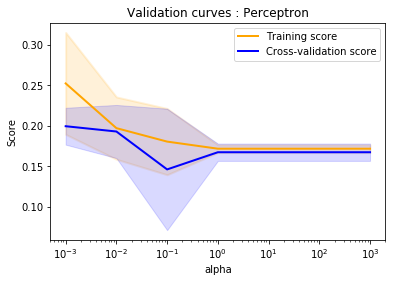

In [5]:
print("model Perceptron")

model1 = Model.Perceptron(reg_penalty='l2', reg=0.001)
para_range = np.logspace(-3, 3, 7)
titleVC = "Validation curves : Perceptron"
plt, test_scores_alpha_means = analyzer.plotValidationCurve(model1.model, x, t, title=titleVC, param_name="alpha",param_range=para_range, verbose=True, scaling="log")
    
bestInd = np.argmax(test_scores_alpha_means)
print(bestInd)
    
model1Alpha = para_range[bestInd]
print("Best alpha for the Perceptron is ", model1Alpha)
    
plt.show()

Training of the model Perceptron  :

In [6]:
# Set hyperparameters of the Perceptron model 
hyp1Mod1 = model1Alpha
print("Training with the parameter (alpha) :", hyp1Mod1)

bestAccuMod1 = 0
bestConfMaxMod1 = 0
bestModel1 =  0

# Training
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " Perceptron model")
    md1 = Model.Perceptron(reg_penalty='l2', reg=hyp1Mod1, random_state=i)
    md1.train(x_train, t_train)
    predictions_test = np.array([md1.prediction(x) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)
    
    if accu[i] > bestAccuMod1:
        bestAccuMod1 = accu[i]
        bestModel1 = md1
        bestConfMaxMod1 = analyzer.confusionMatrix(t_test, predictions_test)

# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod1)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod1)


Training with the parameter (alpha) : 0.001
Training  1  Perceptron model
Initialize model Perceptron
Training  2  Perceptron model
Initialize model Perceptron
Training  3  Perceptron model
Initialize model Perceptron
Training  4  Perceptron model
Initialize model Perceptron
Training  5  Perceptron model
Initialize model Perceptron
[0.22 0.18 0.16 0.14 0.08]
The average accuracy is :  0.156
The std accuracu is :  0.0463033476111609
The best accuracy is :  0.22
The confusion matrix of the best model : 
[[ 0  0  0  3  0  0 10]
 [ 0  0  0  0  0  0  7]
 [ 0  0  1  4  0  0  3]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  4  0  0  2]
 [ 0  0  0  2  0  0  2]
 [ 0  0  0  2  0  0  6]]


Hidden layer to test : 
model 2a(200,) model2b (200,200,200) model 2c(200,400,600) model2d (600,)

Hyperparameters of the multilayer Perceptron(model 2a) :
alpha(reg) : 10^-3 to 10^3

validation curve model Multilayer Perceptron 
[0. 0. 0. 0.]
Initialize model Multi-layer Perceptron
The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.17666771 0.17666771 0.17666771 0.17666771 0.21000104 0.7191797
 0.56354805]
The train scores std are :  [0.02182616 0.02182616 0.02182616 0.02182616 0.05848723 0.05880488
 0.04001694]
The test scores means are :  [0.17178451 0.17178451 0.17178451 0.17178451 0.19178451 0.39461279
 0.34026936]
The test scores std are :  [0.05538711 0.05538711 0.05538711 0.05538711 0.07005329 0.08842959
 0.05380535]
5
Best alpha for the Multilayer Perceptron with  (200,)  is  100.0


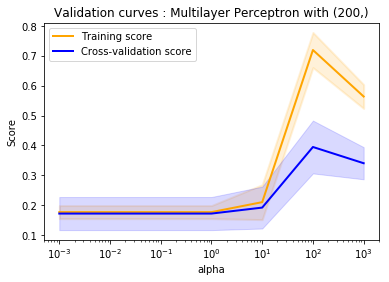

Initialize model Multi-layer Perceptron


/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/s

The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.24356264 0.24689598 0.24860538 0.27189598 0.36470085 0.59295393
 0.34995935]
The train scores std are :  [0.02639701 0.03083551 0.03245744 0.08007238 0.14918034 0.14483142
 0.02174641]
The test scores means are :  [0.18020202 0.18020202 0.18020202 0.19353535 0.23925926 0.3003367
 0.30383838]
The test scores std are :  [0.04425395 0.04425395 0.04425395 0.05654617 0.08995045 0.04589066
 0.06995677]
6
Best alpha for the Multilayer Perceptron with  (200, 200, 200)  is  1000.0


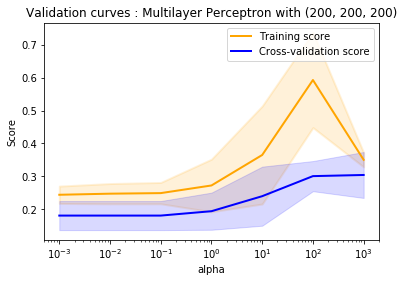

Initialize model Multi-layer Perceptron


/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/s

The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.24068585 0.23893788 0.24231186 0.22609235 0.38101522 0.50771628
 0.32170732]
The train scores std are :  [0.07091411 0.07313884 0.07133962 0.04702104 0.21443967 0.08940208
 0.01944365]
The test scores means are :  [0.22969697 0.18821549 0.22969697 0.22821549 0.24821549 0.31858586
 0.31407407]
The test scores std are :  [0.09583426 0.07277527 0.09583426 0.07728088 0.08027275 0.09865042
 0.05881314]
5
Best alpha for the Multilayer Perceptron with  (200, 400, 600)  is  100.0


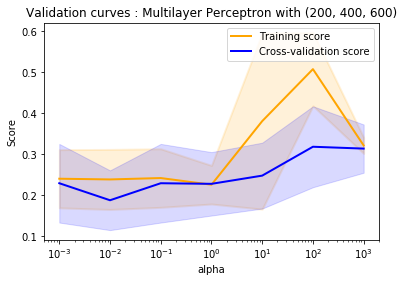

Initialize model Multi-layer Perceptron
The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.15482802 0.153202   0.153202   0.153202   0.153202   0.61651032
 0.52033041]
The train scores std are :  [0.02089945 0.02054465 0.02054465 0.02054465 0.02054465 0.11061563
 0.06439974]
The test scores means are :  [0.1426936  0.1426936  0.1426936  0.1426936  0.1426936  0.34841751
 0.28107744]
The test scores std are :  [0.09098697 0.09098697 0.09098697 0.09098697 0.09098697 0.08437348
 0.03121443]
5
Best alpha for the Multilayer Perceptron with  (600,)  is  100.0


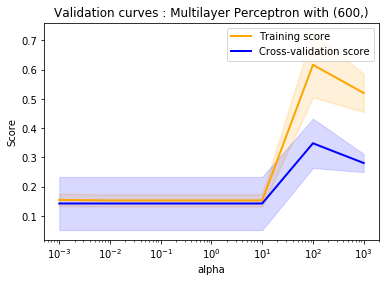

In [7]:
print("validation curve model Multilayer Perceptron ")

list_tuple = [(200,), (200,200,200), (200,400,600), (600,)]
z = 0
model2Alpha = np.zeros(4)
print(model2Alpha)
for specific_tuple in list_tuple:

    model2 = Model.MLPerceptron(hidden_layer_sizes=specific_tuple, activation='relu', reg=0.001)
    para_range = np.logspace(-3, 3, 7)
    titleVC = "Validation curves : Multilayer Perceptron with " + str(specific_tuple)
    plt, test_scores_mlp_alpha_means = analyzer.plotValidationCurve(model2.model, x, t, title=titleVC, param_name="alpha",param_range=para_range, verbose=True, scaling="log")
    
    bestInd = np.argmax(test_scores_mlp_alpha_means)
    print(bestInd)
    
    model2Alpha[z] = para_range[bestInd]
    print("Best alpha for the Multilayer Perceptron with ", specific_tuple, " is ", model2Alpha[z])
    
    plt.show()
    z = z + 1
    

Training of the model multilayer Perceptron (model 2a) :

In [17]:


list_tuple = [(200,), (200,200,200), (200,400,600), (600,)]
z = 0
bestModel2 = [Model.MLPerceptron(hidden_layer_sizes=1), Model.MLPerceptron(hidden_layer_sizes=1), Model.MLPerceptron(hidden_layer_sizes=1), Model.MLPerceptron(hidden_layer_sizes=1) ]

for specific_tuple in list_tuple:
    # Set hyperparameters of the multilayer Perceptron (model2a)
    hyp1Mod2 = model2Alpha[z]
    print("Training with the parameter (alpha) :", hyp1Mod2)

    # Training
    accu = np.zeros(k)

    for i in range(k):
        bestAccuMod2 = 0
        bestConfMaxMod2 = 0
        bestModel2 =  0
        print("Training ", i+1, " multi-layer Perceptron with ", str(specific_tuple) )
        md2 = Model.MLPerceptron(hidden_layer_sizes=specific_tuple, activation='relu', reg=hyp1Mod2, random_state=i) 
        md2.train(x_train, t_train)
        predictions_test = np.array([md2.prediction(x) for x in x_test])

        accu[i] = analyzer.accuracy(t_test, predictions_test)
    
        if accu[i] > bestAccuMod2:
            bestAccuMod2 = accu[i]
            if z == 0:
                bestModel2a = md2
            if z == 1:
                bestModel2b = md2
            if z == 2:
                bestModel2c = md2
            if z == 3:
                bestModel2d = md2
            bestConfMaxMod2 = analyzer.confusionMatrix(t_test, predictions_test)

    # Average accuracy and  std accuracy
    print(accu)
    accuMean = np.mean(accu)
    accuStd = np.std(accu)
    print("The average accuracy is : ", accuMean)
    print("The std accuracu is : ", accuStd)
    print("The best accuracy is : ", bestAccuMod2)
    print("The confusion matrix of the best model : ")
    print(bestConfMaxMod2)
    z = z+1


Initialize model Multi-layer Perceptron
Initialize model Multi-layer Perceptron
Initialize model Multi-layer Perceptron
Initialize model Multi-layer Perceptron
Training with the parameter (alpha) : 100.0
Training  1  multi-layer Perceptron with  (200,)
Initialize model Multi-layer Perceptron
Training  2  multi-layer Perceptron with  (200,)
Initialize model Multi-layer Perceptron
Training  3  multi-layer Perceptron with  (200,)
Initialize model Multi-layer Perceptron
Training  4  multi-layer Perceptron with  (200,)
Initialize model Multi-layer Perceptron
Training  5  multi-layer Perceptron with  (200,)
Initialize model Multi-layer Perceptron
[0.2  0.26 0.26 0.28 0.18]
The average accuracy is :  0.236
The std accuracu is :  0.03878143885933064
The best accuracy is :  0.28
The confusion matrix of the best model : 
[[9 0 3 0 1 0 0]
 [6 0 0 0 0 0 1]
 [4 0 2 0 0 2 0]
 [2 0 0 1 0 1 0]
 [5 0 0 0 0 1 0]
 [2 0 0 0 0 2 0]
 [8 0 0 0 0 0 0]]
Training with the parameter (alpha) : 1000.0
Training  1 

Rbf ou poly ??

Hyperparameters of the model SVM(model 3)(rbf) :
 C : 10^-3 to 10^3 log scale

In [ ]:
bestCMod3 = 1

model3 = Model.ModelSVM(gamma="auto",  kernel="rbf")
para_range = np.logspace(-3, 3, 7)
titleVC = "Validation curves : SVM with rbf ")
plt, test_scores_deg_means = analyzer.plotValidationCurve(model3.model, x, t, title=titleVC, param_name="C",param_range=para_range, verbose=True, scaling="log")
    
bestInd = np.argmax(test_scores_deg_means)
print(bestInd)
    
model3Reg = para_range[bestInd]
print("Best c is : ",model3Reg)
    
plt.show()
    

Training of the model SVM (model 3) :

In [ ]:
# Set hyperparameters of the SVM model
hyp2Mod3 = bestCMod3
print("Training with the parameters (C) :", hyp2Mod3)

bestAccuMod3 = 0
bestConfMaxMod3 = 0
bestModel3 =  0

# Training
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " model SVM with rbf...")
    md3 = Model.ModelSVM(gamma="auto",  kernel="rbf", reg=hyp2Mod3, random_state=i)
    md3.train(x_train, t_train)
    predictions_test = np.array([md3.prediction(x) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)
    
    if accu[i] > bestAccuMod3:
        bestAccuMod3 = accu[i]
        bestModel3 = md3
        bestConfMaxMod3 = analyzer.confusionMatrix(t_test, predictions_test)


# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod3)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod3)


Hyperparameters of the model data tree classifier (model 4) : criterion= 'gini' or 'entropy' and max depth = 2 to 40

In [ ]:
bestCritMod4 = 'gini'
bestMaxDepthMod4 = 2
bestTestScore = float('inf')
dicCriteria = ['gini', 'entropy']

for cri in dicCriteria:
    para_range = np.linspace(2, 40, 39)
    titleVC = "Validation curves : Model Data tree classifier with criterion : " + cri
    model4 = Model.ModelDecisionTree()
    plt, test_scores_means_md = analyzer.plotValidationCurve(model4.model, x, t, title=titleVC, param_name="max_depth",param_range=para_range, verbose=True, scaling="lin")
    
    bestInd = np.argmax(test_scores_means_md)
    print(bestInd)
    model4Maxdepth = para_range[bestInd]
    
    print("Best maxdepth with criterion ", cri ," is : ",model4Maxdepth)
    plt.show()    
    
    if test_scores_means_md[bestInd] < bestTestScore:
        bestTestScore = test_scores_means_md[bestInd]
        bestCritMod4 = cri
        bestMaxDepthMod4 = model4Maxdepth
        
print("The best parameter are (criterion, max_depth) :", bestCritMod4, bestMaxDepthMod4)

Training of the model Data tree classifier :

In [ ]:
# Set hyperparameters of the model data tree classifier
hyp1Mod4 = bestCritMod4
hyp2Mod4 = bestMaxDepthMod4

bestAccuMod4 = 0
bestConfMaxMod4 = 0
bestModel4 =  0

# Training 
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " model data tree classifier...")
    md4 = Model.ModelDecisionTree(max_depth=hyp2Mod4, criterion=hyp1Mod4, random_state=i)
    md4.train(x_train, t_train)
    predictions_test = np.array([md4.prediction(x.reshape(1, -1)) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)

    if accu[i] > bestAccuMod4:
        bestAccuMod4 = accu[i]
        bestModel4 = md4
        bestConfMaxMod4 = analyzer.confusionMatrix(t_test, predictions_test)

    
# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod4)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod4)


Hyperparameters of the Logistic Regression (Model 5) : C : 10^-3 to 10^3

In [ ]:
print("Validation curve Logistic Regression (model 5)")

model5 = Model.LogisticRegression(reg_penalty='l2', reg_inv=1.0)
para_range = np.logspace(-3, 3, 7)
titleVC = "Validation curves : Logistic Regression"
plt, test_scores_C_means = analyzer.plotValidationCurve(model5.model, x, t, title=titleVC, param_name="C",param_range=para_range, verbose=True, scaling="log")

bestInd = np.argmax(test_scores_C_means)
print(bestInd)
    
model5C = para_range[bestInd]
print("Best C for the logistic Regression is ", model5C)
    
plt.show()

Training of the Logistic Regression (Model 5) :

In [ ]:
# Set hyperparameters of the Logistic Regression (Model 5)
hyp1Mod5 = model5C

bestAccuMod5 = 0
bestConfMaxMod5 = 0
bestModel5 =  0

#Training
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " model Logistic Regression...")
    md5 = Model.LogisticRegression(reg_penalty='l2', reg_inv=hyp1Mod5, random_state=i)
    md5.train(x_train, t_train)
    predictions_test = np.array([md5.prediction(x) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)
    if accu[i] > bestAccuMod5:
        bestAccuMod5 = accu[i]
        bestModel5 = md5
        bestConfMaxMod5 = analyzer.confusionMatrix(t_test, predictions_test)


# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod5)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod5)


Training of the model Bagging (model 6) :

In [ ]:
# Setting up base model

base_model = 'Perceptron'
number_model = 50
bestAccuMod6 = 0
bestConfMaxMod6 = 0
bestModel6 =  0

# Training 
accu = np.zeros(k)

for j in range(k):
    print("Training ", j+1, " Bagging model..." )
    md6 = Model.Bagging(base_model=base_model, number_model=number_model, reg_penalty='l2', reg=hyp1Mod1,random_state=i)
    md6.train(x_train, t_train)
    predictions_test = np.array([md6.prediction(x) for x in x_test])

    accu[j] = analyzer.accuracy(t_test, predictions_test)
    if accu[j] > bestAccuMod6:
        bestAccuMod6 = accu[j]
        bestModel6 = md6
        bestConfMaxMod6 = analyzer.confusionMatrix(t_test, predictions_test)
    
# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod6)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod6)

Learning curves of each model with the best model : 

/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/s

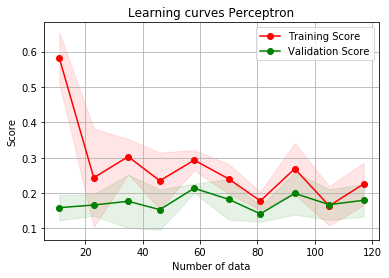

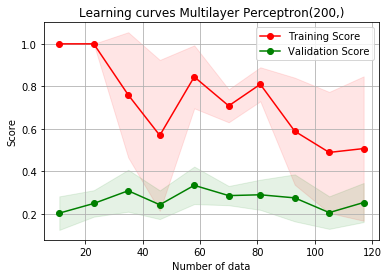

/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWar

/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/s

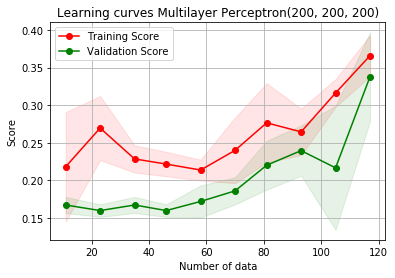

/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: T

In [ ]:
titleLc1 = "Learning curves Perceptron"
analyzer.plotLearningCurves(bestModel1.model, x, t, title=titleLc1)

z=0
for specific_tuple in list_tuple:
    
    if z == 0:
        bestModel2 = bestModel2a
    if z == 1:
        bestModel2 = bestModel2b
    if z == 2:
        bestModel2 = bestModel2c
    if z == 3:
        bestModel2 = bestModel2d
    
    titleLc2 = "Learning curves Multilayer Perceptron" + str(specific_tuple)
    analyzer.plotLearningCurves(bestModel2.model, x, t, title=titleLc2)
    plt.show()
    z= z+1
    
titleLc3 = "Learning curves SVM with rbf"
analyzer.plotLearningCurves(bestModel3.model, x, t, title=titleLc3)
plt.show()
   
titleLc4 = "Learning curves Data tree classifier"
analyzer.plotLearningCurves(bestModel4.model, x, t, title=titleLc4)
plt.show()

titleLc5 = "Learning curves Logistic Regression"
analyzer.plotLearningCurves(bestModel5.model, x, t, title=titleLc5)
plt.show()

titleLc6 = "Learning curves Bagging"
analyzer.plotLearningCurves(bestModel6.model, x, t, title=titleLc6)
plt.show()

Hyperparameters SVM with poly kernel :
deg : 1 to 3
C : 10^-3 to 10^3

In [ ]:
minDeg = 1
maxDeg = 4
print(range(minDeg, maxDeg))
bestDegMod7 = 1
bestCMod7 = 1
bestTestScore = float("inf")

for deg in range(minDeg, maxDeg):
    model7 = Model.ModelSVM(gamma="auto",  kernel="poly", degree=1)
    para_range = np.logspace(-3, 3, 7)
    titleVC = "Validation curves : SVM with degree " + str(deg)
    plt, test_scores_deg_means = analyzer.plotValidationCurve(model7.model, x, t, title=titleVC, param_name="C",param_range=para_range, verbose=True, scaling="log")
    
    bestInd = np.argmax(test_scores_deg_means)
    print(bestInd)
    
    model7Reg = para_range[bestInd]
    print("Best c for the degree ", deg, " is : ",model7Reg)
    
    plt.show()
    
    if test_scores_deg_means[bestInd] < bestTestScore:
        bestTestScore
        bestCMod7 = mode73Reg
        bestDegMod7 = deg

print("The best parameter are (deg, C) :", bestDegMod7, bestCMod7)

Training model SVM with poly kernel : 

In [ ]:
# Set hyperparameters of the SVM model
hyp1Mod7 = bestDegMod7
hyp2Mod7 = bestCMod7
print("Training with the parameters (deg, C) :", hyp1Mod7, hyp2Mod7)

bestAccuMod7 = 0
bestConfMaxMod7 = 0
bestModel7 =  0

# Training
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " model SVM...")
    md7 = Model.ModelSVM(gamma="auto",  kernel="poly", degree=hyp1Mod7, reg=hyp2Mod7, random_state=i)
    md7.train(x_train, t_train)
    predictions_test = np.array([md7.prediction(x) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)
    
    if accu[i] > bestAccuMod7:
        bestAccuMod7 = accu[i]
        bestModel7 = md7
        bestConfMaxMod7 = analyzer.confusionMatrix(t_test, predictions_test)


# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod7)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod7)

Learning curves SVM(poly):

In [ ]:
titleLc7 = "Learning curves SVM with poly"
analyzer.plotLearningCurves(bestModel7.model, x, t, titleLc7)
plt.show()